# Project 1 Revisited - Part 2: Global Explanations

In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

## Load Your Saved Joblib File

In [2]:
loaded = joblib.load('bestmodels.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'DecisionTreeRegressor'])

In [3]:
X_train = loaded['X_train']
X_test = loaded['X_test']
y_train = loaded['y_train']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
lin_reg_final = loaded['LinearRegression']
dec_tree = loaded['DecisionTreeRegressor']

## Explain your tree-based model with shap:

In [4]:
import shap
shap.initjs()

In [5]:
len(X_train)

6392

In [6]:
X_shap = shap.sample(X_train,nsamples = 6392,random_state=42)
y_shap = y_train.loc[X_shap.index]
X_shap.head()

,pipeline-1__Item_Weight,pipeline-1__Item_Visibility,pipeline-1__Item_MRP,pipeline-1__Outlet_Establishment_Year,pipeline-2__Item_Identifier_DRA12,pipeline-2__Item_Identifier_DRA24,pipeline-2__Item_Identifier_DRA59,pipeline-2__Item_Identifier_DRB01,pipeline-2__Item_Identifier_DRB13,pipeline-2__Item_Identifier_DRB24,...,pipeline-2__Outlet_Identifier_OUT045,pipeline-2__Outlet_Identifier_OUT046,pipeline-2__Outlet_Identifier_OUT049,pipeline-2__Outlet_Location_Type_Tier 1,pipeline-2__Outlet_Location_Type_Tier 2,pipeline-2__Outlet_Location_Type_Tier 3,pipeline-2__Outlet_Type_Grocery Store,pipeline-2__Outlet_Type_Supermarket Type1,pipeline-2__Outlet_Type_Supermarket Type2,pipeline-2__Outlet_Type_Supermarket Type3
4776,0.829446,-0.712775,1.828109,1.327849,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.568634,-1.291052,0.603369,1.327849,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.118961,1.813319,0.244541,0.136187,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.156281,-1.004931,-0.952591,0.732018,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.540750,-0.965484,-0.336460,0.493686,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [7]:
explainer = shap.Explainer(dec_tree)
explainer

In [8]:
shap_values = explainer(X_shap, y_shap)
type(shap_values)

shap._explanation.Explanation

In [9]:
shap_values.shape

(6392, 1589)

In [10]:
shap_values[0]

.values =
array([ -31.83335457, -256.68783742,  889.56625127, ...,   -8.96112269,
        -15.34535045,    0.        ])

.base_values =
array([2209.9793572])

.data =
array([ 0.82944552, -0.71277507,  1.82810922, ...,  0.        ,
        1.        ,  0.        ])

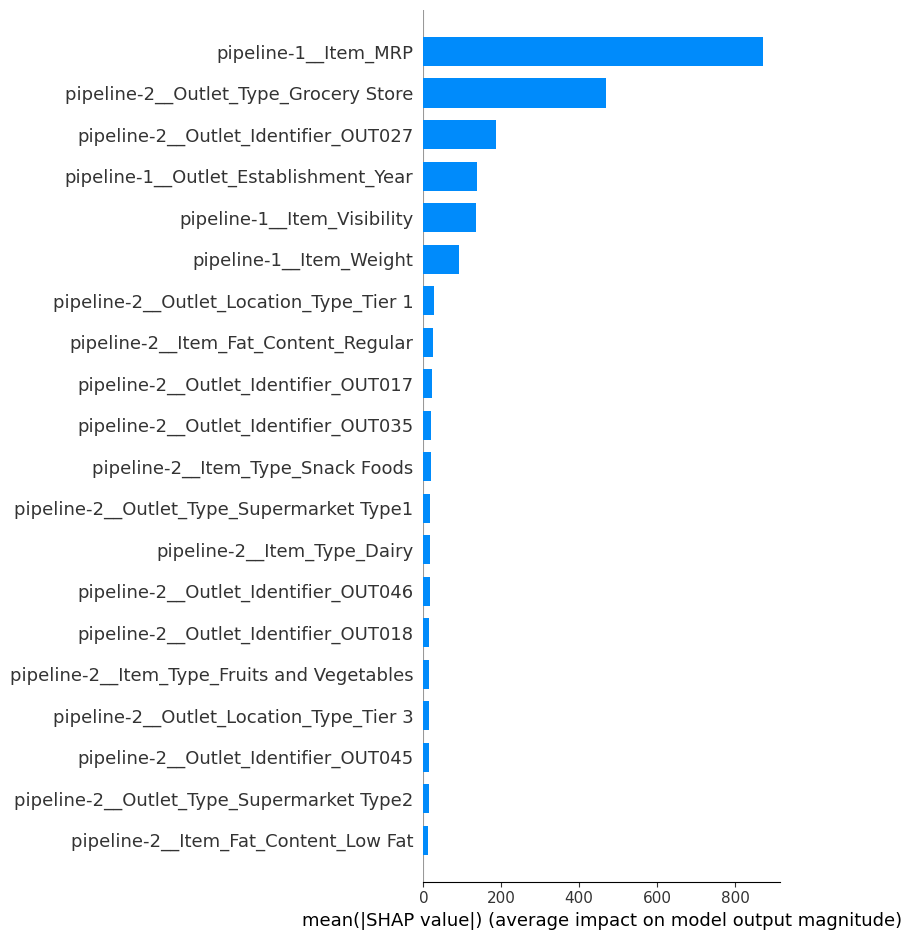

In [11]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, features = X_shap, plot_type='bar')

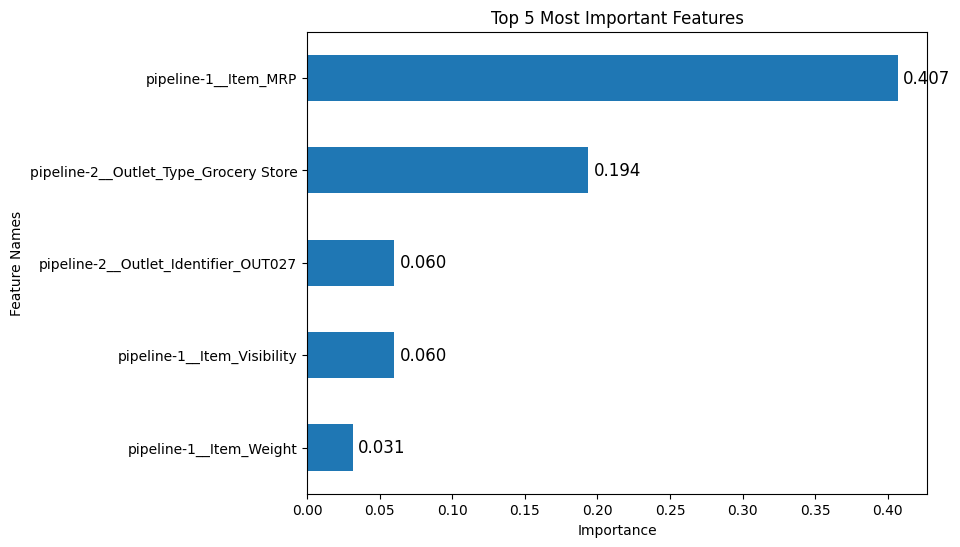

Both graphs are similar in the top 5 except for shap including outlet establishment year in the 4th spot but both graphs have item mrp at the top. 

In [12]:
fig.savefig('Images/DecTree_SHAP_Bar.png', bbox_inches = 'tight')

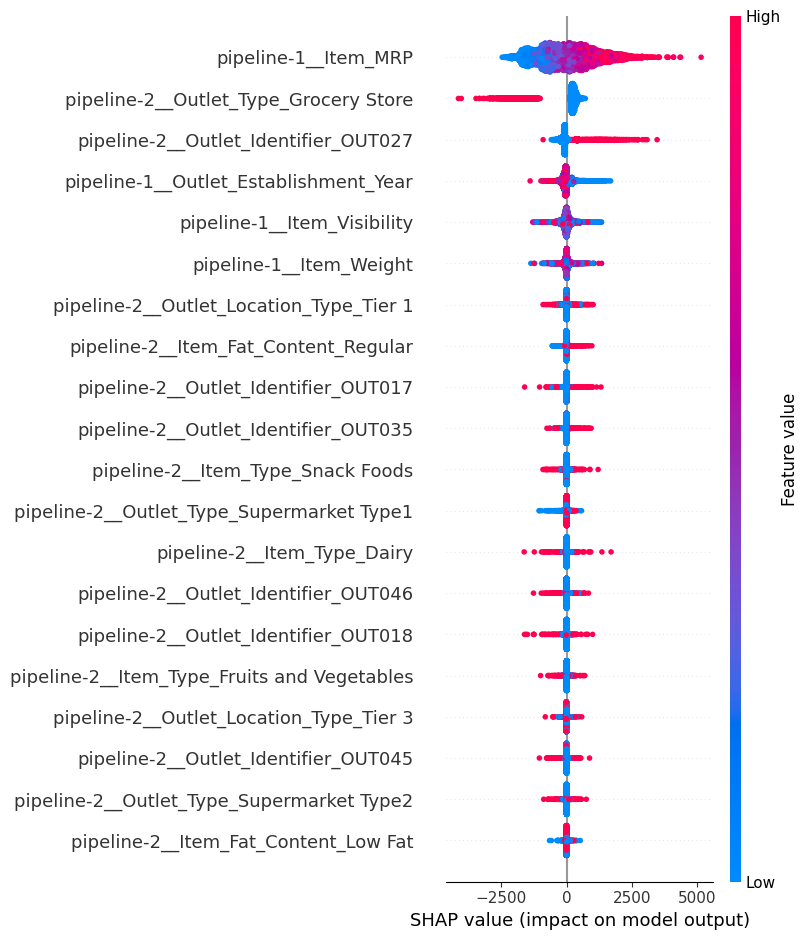

In [13]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, features = X_shap)

In [14]:
fig.savefig('Images/DecTree_SHAP_Dot.png', bbox_inches = 'tight')

The top 3 features are Item MRP, Outlet Type Grocery Store, and Outlet Identifier OUT027 with Item MRP having the most positive impact to Item Sales while Outlet Type Grocery Store is the opposite. 